#### 结点特征对比

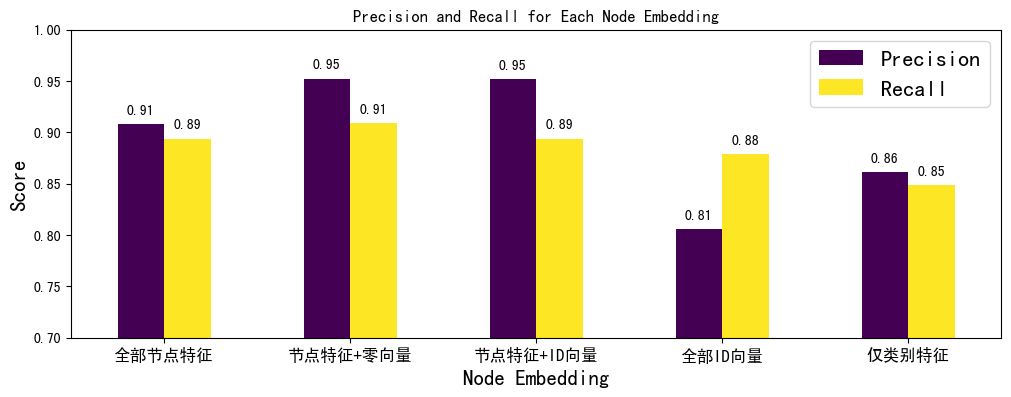

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def generate_classification_report(feats_path):
    # Load the dataset
    dataset = np.load(feats_path)
    
    # Extract true labels and predicted probabilities
    y_true, y_pred = dataset['label'], dataset['prob']
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate the classification report
    report = classification_report(y_true, y_pred, zero_division=0, output_dict=True, target_names=["Non-TF", "TF"])
    
    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(report)
    
    return report_df

result_list = []
for feats in range(5):
    result_list.append(generate_classification_report(f"../output/node_feat/feats{feats}.npz"))
# Extract F1-score and Recall for each class from the result_list
f1_scores = [result['TF']['precision'] for result in result_list]
recalls = [result['TF']['recall'] for result in result_list]

# Define custom index descriptions
index_descriptions = [
'全部节点特征',
'节点特征+零向量',
'节点特征+ID向量',
'全部ID向量',
'仅类别特征',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': f1_scores, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, colormap='viridis', figsize=(12, 4))
ax.set_ylim(0.7, 1)
ax.set_ylabel('Score', size=15)
ax.set_xlabel('Node Embedding', size=15)
ax.set_title('Precision and Recall for Each Node Embedding')

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(fontsize=16)
plt.show()

#### 结点特征对比

In [2]:
node_feat_result = []
node_feat_result.append(generate_classification_report("save/feats5.npz"))
node_feat_result.append(generate_classification_report("save/feats1.npz"))
node_feat_result.append(generate_classification_report("save/total node embedding.npz"))

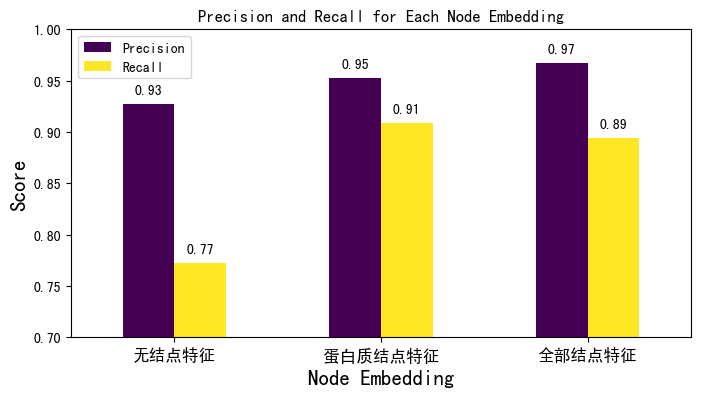

In [3]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'无结点特征',
'蛋白质结点特征',
'全部结点特征',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, colormap='viridis', figsize=(8, 4))
ax.set_ylim(0.7, 1)
ax.set_ylabel('Score', size=15)
ax.set_xlabel('Node Embedding', size=15)
ax.set_title('Precision and Recall for Each Node Embedding')

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(fontsize=10)
plt.show()

#### 边特征对比

In [4]:
node_feat_result = []
node_feat_result.append(generate_classification_report("../output/total node embedding.npz"))
node_feat_result.append(generate_classification_report("../output/edge_embedding.npz"))

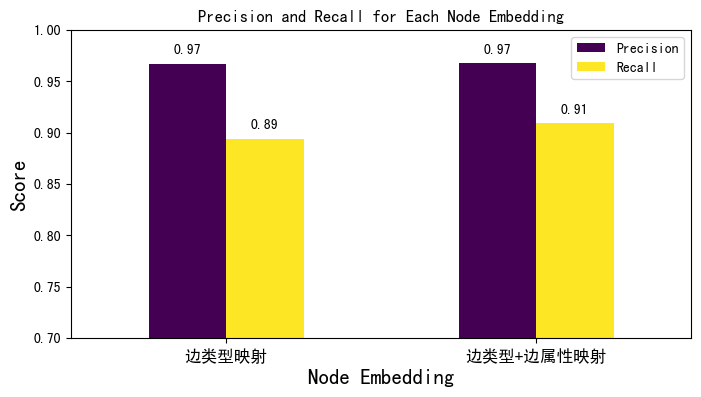

In [5]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'边类型映射',
'边类型+边属性映射',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, colormap='viridis', figsize=(8, 4))
ax.set_ylim(0.7, 1)
ax.set_ylabel('Score', size=15)
ax.set_xlabel('Node Embedding', size=15)
ax.set_title('Precision and Recall for Each Node Embedding')

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(fontsize=10)
plt.show()

#### 损失函数对比

In [6]:
node_feat_result = []
node_feat_result.append(generate_classification_report("save/loss_normal.npz"))
node_feat_result.append(generate_classification_report("save/loss_weight.npz"))
node_feat_result.append(generate_classification_report("save/loss_focal.npz"))

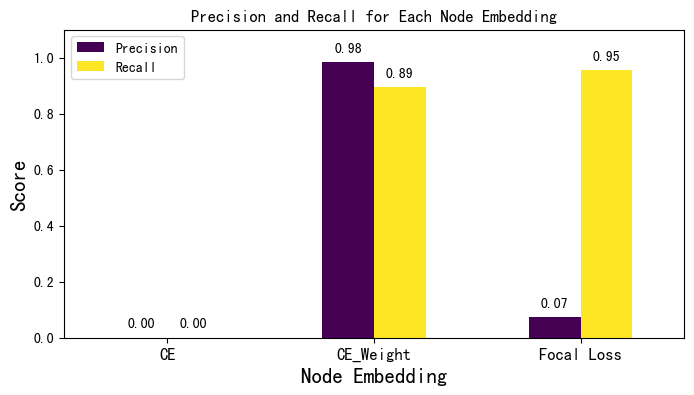

In [11]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'CE',
'CE_Weight',
'Focal Loss',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, colormap='viridis', figsize=(8, 4))
ax.set_ylim(0., 1.1)
ax.set_ylabel('Score', size=15)
ax.set_xlabel('Node Embedding', size=15)
ax.set_title('Precision and Recall for Each Node Embedding')

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(fontsize=10)
plt.show()